In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
data=pd.read_csv("C:/Users/Rajesh/Documents/me/data_assignments/mod14/wine.csv")
data.head()
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
#removing first col because not required
data1=data.drop(['Type'],axis=1) #removing first col
data1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


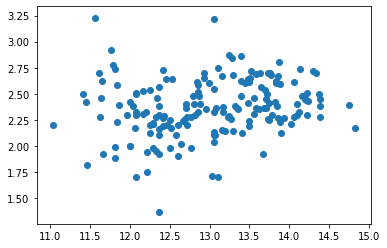

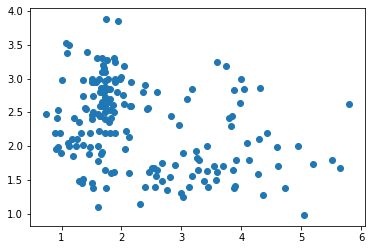

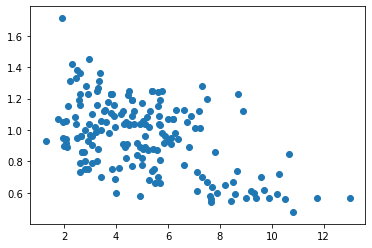

In [9]:
import seaborn as sns
#EDA
data.shape
data.dtypes
data.isna()
data.describe()
data.corr()

plt.scatter(x=data['Alcohol'],y=data['Ash'])
plt.show()
plt.scatter(x=data['Malic'],y=data['Phenols'])
plt.show()
plt.scatter(x=data['Color'],y=data['Hue'])
plt.show()

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 


# Normalizing the numerical data 
uni_normal = scale(data1)
uni_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [11]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(uni_normal)

In [12]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823])

In [13]:
pca.components_
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

In [14]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([36.2 , 55.41, 66.53, 73.6 , 80.16, 85.1 ])

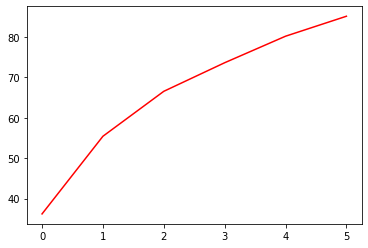

In [15]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")
#cluster 3-4 looks good as it captures 75%-80%of data

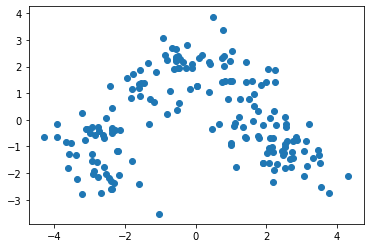

In [16]:
# plot between PCA1 and PCA2 
x = pca_values[:,0]
y = pca_values[:,1]
pca_values
# z = pca_values[:2:3]
plt.scatter(x,y)

In [18]:
from sklearn.cluster import KMeans
df = pd.DataFrame(data1)
#elbow curve to see if clusters are same to dimensionally reduced data vs original
###### screw plot or elbow curve ############
from scipy.spatial.distance import cdist 
k = list(range(2,23))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2287b28f748>,
 <a list of 21 Text xticklabel objects>)

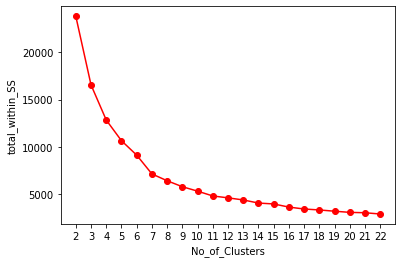

In [19]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)
#similar - can be 5-7 clusters

In [20]:
from scipy.cluster.hierarchy import linkage
z=linkage(data1,method="average",metric="euclidean")

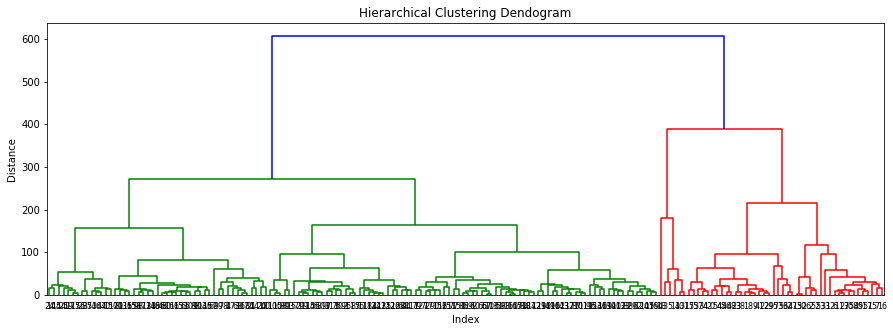

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,5));plt.title("Hierarchical Clustering Dendogram");plt.xlabel("Index"),plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8.)
plt.show()
#clusters showing 3 clusters similar to the dimensionally reduced data